In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse
import numpy as np 
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt



In [4]:
df = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Datasets\Coal Consumption.csv")
df.head()





,Month,Amount
0,Jan-90,16.50
1,Feb-90,15.17
2,Mar-90,12.75
3,Apr-90,12.31
4,May-90,8.34


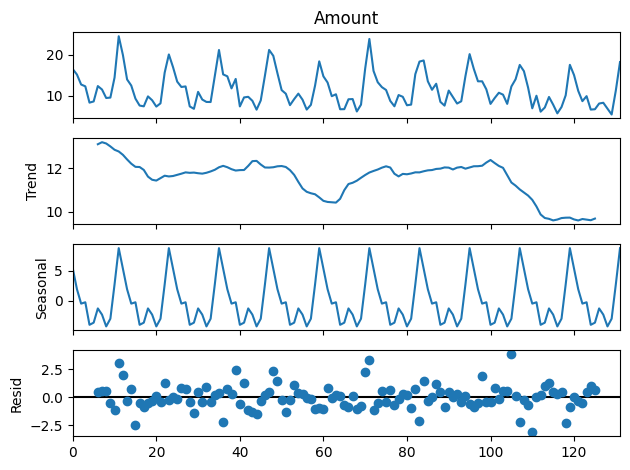

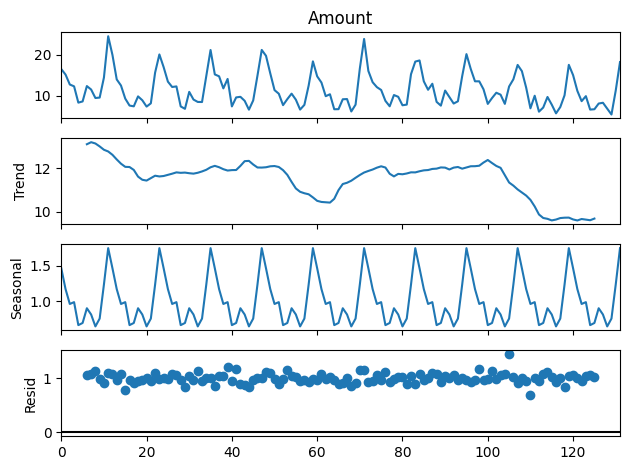

In [7]:
series = df['Amount']
result = seasonal_decompose(series, model='additive',period=12)
result.plot()
plt.show()

result = seasonal_decompose(series, model='multiplicative',period=12)
result.plot()
plt.show()


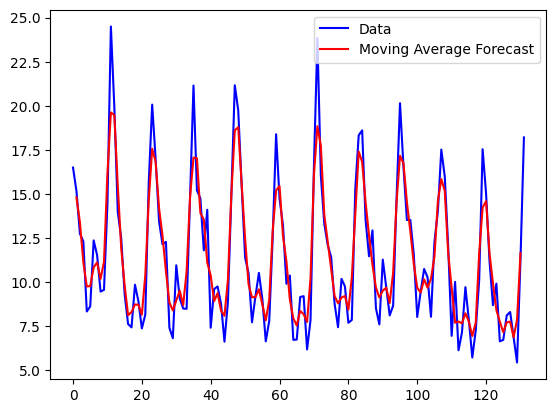

In [9]:
y = df['Amount']
#### Centered MA
fcast = y.rolling(3,center=True).mean()
plt.plot(y, label='Data',color='blue')
plt.plot(fcast, label='Moving Average Forecast',
         color='red')
plt.legend(loc='best')
plt.show()






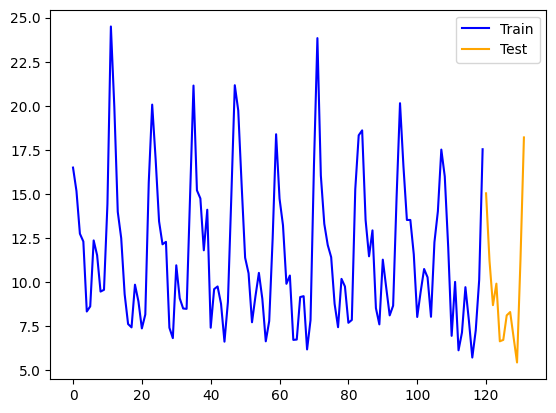

In [10]:
y_train = df['Amount'][:-12]
y_test = df['Amount'][-12:]
plt.plot(y_train, label='Train',color='blue')
plt.plot(y_test, label='Test',color='orange')
plt.legend(loc='best')
plt.show()

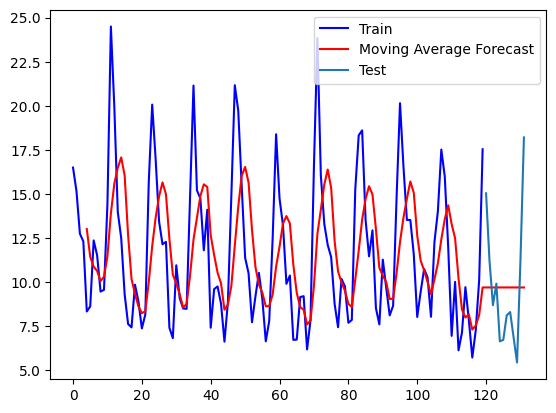

MSE = 12.951249333333335


In [11]:
#### Trailing Rolling Mean
fcast = y_train.rolling(5,center=False).mean()
lastMA = fcast.iloc[-1]
fSeries = pd.Series(lastMA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, fSeries],
                     ignore_index=True)
plt.plot(y_train, label='Train',color='blue')
plt.plot(MA_fcast, label='Moving Average Forecast',
         color='red')
plt.plot(y_test, label="Test")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fSeries))



C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


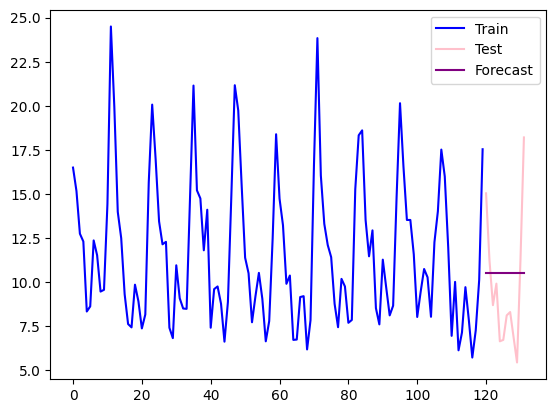

MSE = 13.593533144993616


In [12]:
alpha = 0.1
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fcast1))

C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


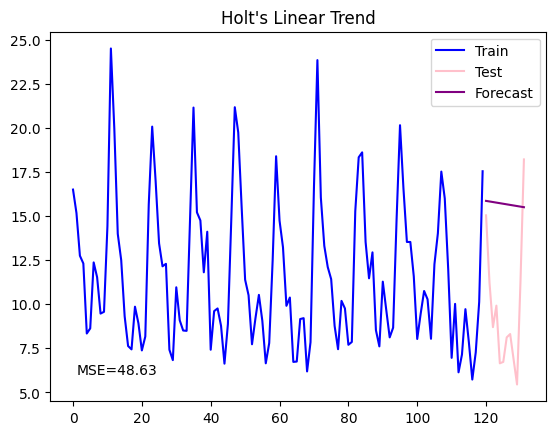

MSE = 48.63422159062916


In [14]:
# Holt's Linear Method
alpha = 0.8
beta = 0.02
### Linear Trend
fit1 = Holt(y_train).fit(smoothing_level=alpha, 
                         smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fcast1))


C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


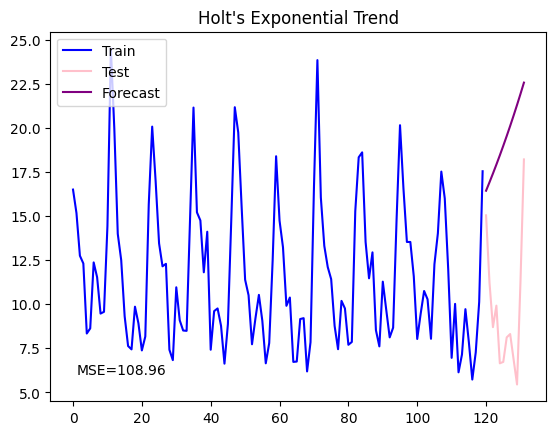

MSE = 108.95874788954411


In [16]:
# Holt's Exponential Method
alpha = 0.8
beta = 0.02
### Linear Trend
fit1 = Holt(y_train, exponential=True).fit(smoothing_level=alpha, 
                         smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fcast1))




C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


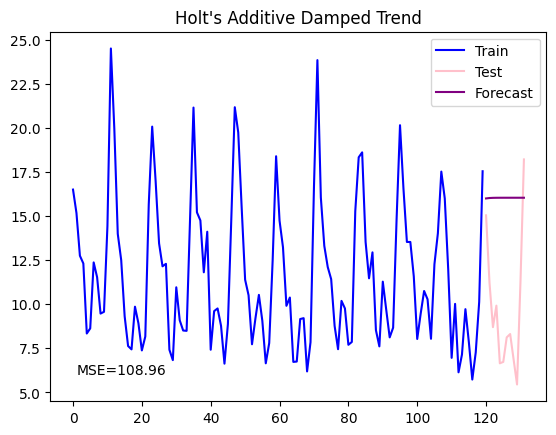

In [17]:
### Additive Damped Trend
alpha = 0.8
beta = 0.02
phi = 0.4
fit3 = Holt(y_train, damped_trend=True).fit(smoothing_level=alpha,
                                      damping_trend= phi,
                                      smoothing_trend=beta)
fcast3 = fit3.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.title("Holt's Additive Damped Trend")
plt.legend(loc='best')
plt.show()


C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


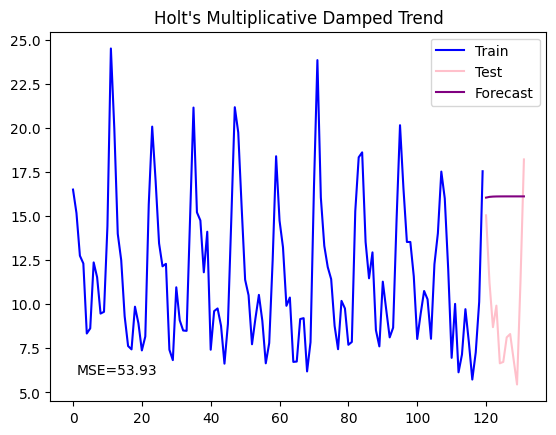

In [18]:

### Multiplicative Damped Trend
alpha = 0.8
beta = 0.02
phi = 0.4
fit3 = Holt(y_train, damped_trend=True,
            exponential=True).fit(smoothing_level=alpha,
                                      damping_trend= phi,
                                      smoothing_trend=beta)
fcast3 = fit3.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast3),2)))
plt.title("Holt's Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()



# Holt-Winters' Method

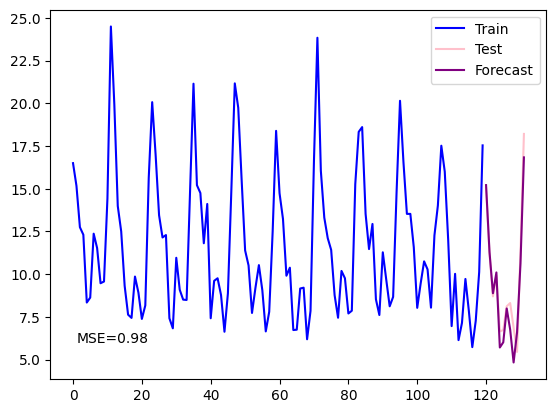

In [19]:


########### Additive #####################
alpha = 0.8
beta = 0.02
phi = 0.4
gamma = 0.3
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            seasonal='add').fit(smoothing_level=alpha,
                                                smoothing_trend=beta,
                                                smoothing_seasonal=gamma)

fcast1 = fit1.forecast(len(y_test)).rename("Holt-Winters Additive Trend and seasonality")
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



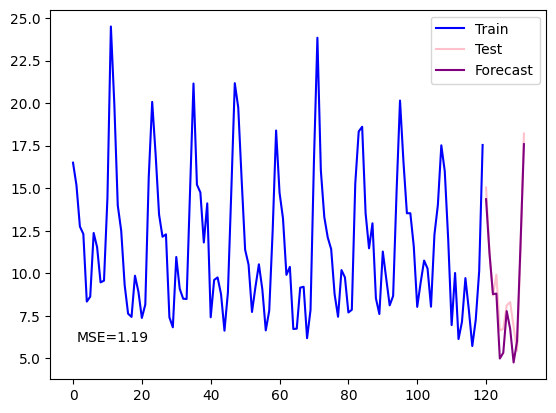

In [20]:
### auto-tuning
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            seasonal='add').fit()

fcast1 = fit1.forecast(len(y_test)).rename("Holt-Winters Additive Trend and seasonality")
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



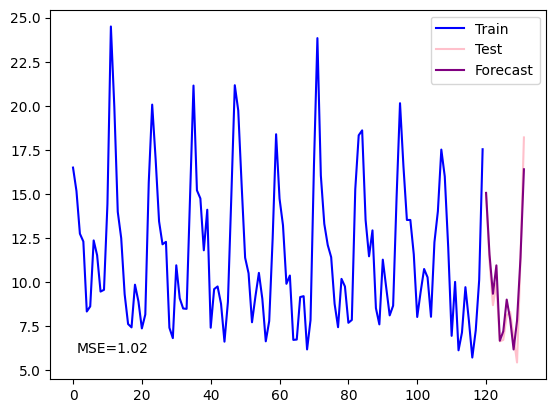

In [21]:

########### Mult #####################
alpha = 0.8
beta = 0.02
phi = 0.4
gamma = 0.3
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            seasonal='mul').fit(smoothing_level=alpha,
                                                smoothing_trend=beta,
                                                smoothing_seasonal=gamma)

fcast1 = fit1.forecast(len(y_test)).rename("Holt-Winters Additive Trend and seasonality")
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



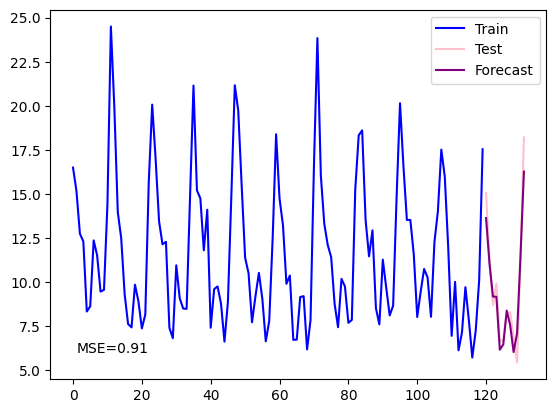

In [22]:
## Auto-Tune
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            seasonal='mul').fit()

fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



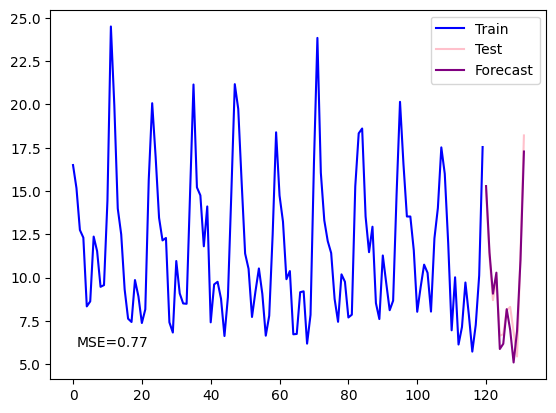

In [23]:
### HW Add with Damping #################

alpha = 0.8
beta = 0.02
phi = 0.4
gamma = 0.3
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            damped_trend=True,
                            seasonal='add').fit(smoothing_level=alpha,
                                                smoothing_trend=beta,
                                                smoothing_seasonal=gamma,
                                                damping_trend=phi)

fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



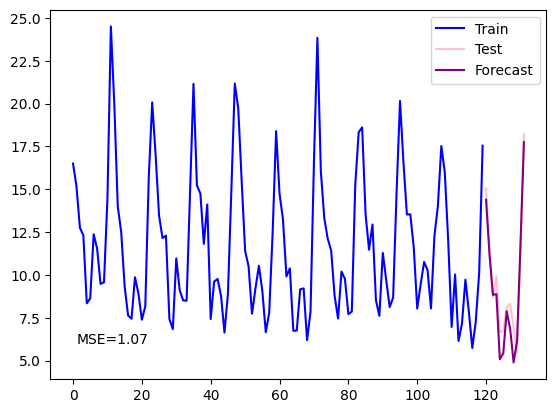

In [24]:
### auto-tuning
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            damped_trend=True,
                            seasonal='add').fit()

fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



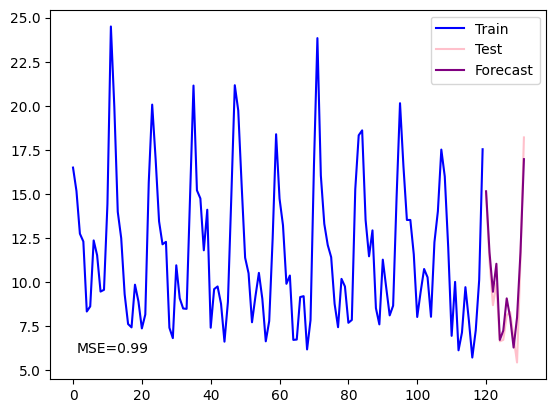

In [25]:
###### HW multi with damping
alpha = 0.8
beta = 0.02
phi = 0.4
gamma = 0.3
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            damped_trend=True,
                            seasonal='mul').fit(smoothing_level=alpha,
                                                smoothing_trend=beta,
                                                smoothing_seasonal=gamma,
                                                damping_trend=phi)

fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()



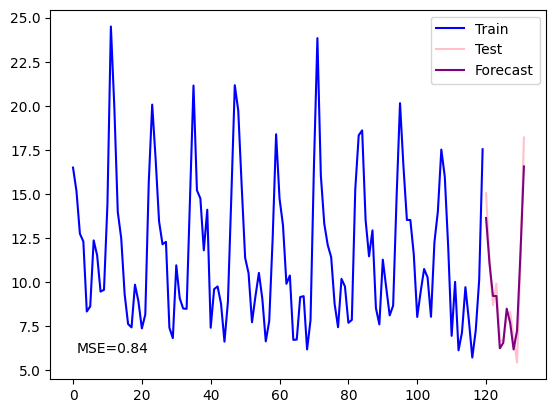

In [26]:
### auto-tuning
fit1 = ExponentialSmoothing(y_train, 
                            seasonal_periods=12, 
                            trend='add', 
                            damped_trend=True,
                            seasonal='mul').fit()

fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(1,6,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.legend(loc='best')
plt.show()




In [28]:
pd.__version__

'1.5.3'

In [29]:
!pip install sktime


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 17.1/17.1 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 118.2/118.2 kB 6.7 MB/s eta 0:00:00
